## Reinforcement Learning (RL)

### Overview
Reinforcement Learning (RL) is a type of machine learning where an agent learns to make decisions by interacting with an environment. The agent's goal is to maximize cumulative rewards over time. Unlike supervised learning, which relies on labeled input/output pairs, RL focuses on learning from the consequences of actions through trial and error, making it particularly suitable for tasks where the correct actions are not known beforehand.

### Key Concepts
- **Agent**: The learner or decision-maker that interacts with the environment.
- **Environment**: The external system with which the agent interacts, providing states and rewards in response to the agent's actions.
- **State (s)**: A representation of the current situation of the agent within the environment.
- **Action (a)**: A set of all possible moves or decisions the agent can make.
- **Reward (r)**: Feedback from the environment to evaluate the action taken, guiding the agent towards the goal.
- **Policy (π)**: A strategy used by the agent to determine the next action based on the current state.
- **Value Function (V)**: A function that estimates the expected cumulative reward from a given state, guiding the agent in value-based methods.
- **Q-Value (Q)**: A function that estimates the expected cumulative reward from a given state-action pair, often used in action-value methods.

### Types of RL
- **Model-Free RL**: The agent learns a policy directly from interactions with the environment without explicitly modeling the environment's dynamics.
  - **Examples**: Q-Learning, SARSA, Deep Q-Network (DQN), Deep Deterministic Policy Gradient (DDPG)
- **Model-Based RL**: The agent builds a model of the environment's dynamics and plans actions using this model.
  - **Examples**: Dynamic Programming, Monte Carlo Methods, Model Predictive Control (MPC)

## Deep Deterministic Policy Gradient (DDPG)

### Overview
Deep Deterministic Policy Gradient (DDPG) is a model-free, off-policy algorithm used in reinforcement learning for solving continuous action spaces. DDPG combines elements from both Q-Learning and Policy Gradient methods, leveraging neural networks to approximate the policy and value functions.

### Core Concepts

#### Actor-Critic Architecture
- **Actor Network**: This neural network outputs the action to be taken given a state. It represents the policy (π) and is responsible for selecting actions.
- **Critic Network**: This neural network evaluates the action taken by the actor by estimating the Q-value. It represents the value function (Q) and helps in updating the actor.

#### Target Networks
- To stabilize training, DDPG maintains two additional networks, known as target networks, for both the actor and critic. These target networks are slowly updated to track the learned networks, mitigating the issue of unstable learning that arises from rapidly changing target values.

#### Experience Replay
- DDPG uses an experience replay buffer to store the agent's experiences (state, action, reward, next state). During training, it samples random batches from this buffer to break the correlation between consecutive samples, leading to more stable and efficient learning.

### Detailed Explanation of DDPG

1. **Initialization**:
   - Initialize the actor network (π) and critic network (Q) with random weights.
   - Initialize corresponding target networks (π' and Q') with the same weights as the original networks.
   - Initialize the replay buffer to store experiences.

2. **Interaction with the Environment**:
   - At each time step, the agent selects an action using the actor network. To encourage exploration, noise is added to the action.
   - The environment provides the next state and reward based on the action taken.
   - The experience (state, action, reward, next state) is stored in the replay buffer.

3. **Training the Networks**:
   - Sample a batch of experiences from the replay buffer.
   - Compute the target Q-value using the critic target network and the target actor network.
   - Update the critic network by minimizing the loss between the predicted Q-values and the target Q-values.
   - Update the actor network by maximizing the expected return using the critic network's evaluations.
   - Periodically update the target networks using a soft update mechanism, ensuring they gradually track the learned networks.

### Advantages
- **Continuous Action Space Handling**: Unlike traditional Q-learning, DDPG can effectively handle environments with continuous action spaces, making it suitable for robotic control and other complex tasks.
- **Stabilized Learning**: The use of target networks and experience replay buffers helps stabilize the training process, reducing the variance in updates and improving learning efficiency.
- **Efficient Exploration**: By adding noise to the action selection process, DDPG balances exploration and exploitation, allowing the agent to discover better policies over time.

### Limitations
- **Hyperparameter Sensitivity**: DDPG's performance can be highly sensitive to the choice of hyperparameters such as learning rates, batch sizes, and the noise process used for exploration.
- **Exploration Challenges**: Despite the added noise, DDPG can still suffer from inadequate exploration, particularly in environments with sparse rewards or deceptive reward structures.
- **Sample Efficiency**: Although more sample-efficient than some policy gradient methods, DDPG still requires a large number of samples to learn effectively, which can be computationally expensive.
- **Overestimation Bias**: Similar to Q-learning, DDPG can suffer from overestimation bias in the Q-value function, potentially leading to suboptimal policies and slower convergence.

DDPG is a powerful and flexible algorithm for solving continuous control tasks in reinforcement learning. By combining the strengths of value-based and policy-based methods, it effectively learns in environments where discrete action spaces are insufficient. However, its performance is contingent on careful tuning and handling of exploration challenges, making it essential to understand and address its limitations for successful application.

## Theory Behind DQN

### Reinforcement Learning Basics

In RL, an agent interacts with an environment, learning to perform actions to maximize cumulative rewards. The interaction is typically modeled as a Markov Decision Process (MDP), which is defined by:
- A set of states \( S \)
- A set of actions \( A \)
- A transition function \( P(s'|s,a) \) that defines the probability of reaching state \( s' \) from state \( s \) after taking action \( a \)
- A reward function \( R(s,a) \) that provides the reward received after taking action \( a \) in state \( s \)
- A discount factor \( \gamma \in [0,1] \) that models the importance of future rewards

The goal is to find a policy \( \pi(a|s) \) that maximizes the expected cumulative reward.

### Q-Learning

Q-learning is a model-free RL algorithm that learns the value of state-action pairs, represented by the Q-function \( Q(s, a) \). The Q-function is updated using the Bellman equation:

\[ Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)] \]

where \( \alpha \) is the learning rate, \( r \) is the reward received, \( s' \) is the next state, and \( \gamma \) is the discount factor.

### Deep Q-Learning

In large state and action spaces, storing and updating a Q-value for each state-action pair becomes infeasible. DQN addresses this by approximating the Q-function with a neural network, \( Q(s, a; \theta) \), where \( \theta \) are the parameters of the network.





## Core Concepts of DQN

### Neural Network for Q-Function Approximation

DQN uses a neural network to approximate the Q-function. The network takes the state \( s \) as input and outputs Q-values for all possible actions. The network parameters \( \theta \) are updated to minimize the loss function:

\[ L(\theta) = \mathbb{E}_{(s,a,r,s') \sim \mathcal{D}} \left[ \left( r + \gamma \max_{a'} Q(s', a'; \theta^-) - Q(s, a; \theta) \right)^2 \right] \]

where \( \theta^- \) are the parameters of a target network, which is a copy of the Q-network updated periodically to stabilize training.

### Experience Replay

To break the correlation between consecutive samples and improve sample efficiency, DQN uses an experience replay buffer \( \mathcal{D} \). The agent's experiences \((s, a, r, s')\) are stored in the buffer, and mini-batches of experiences are randomly sampled to update the network.

### Target Network

To stabilize training and prevent oscillations, DQN uses a target network with parameters \( \theta^- \), which are updated less frequently (e.g., every fixed number of steps) than the main network parameters \( \theta \). The target network is used to compute the target Q-value in the loss function.

## Limitations of DQN

1. **Stability and Convergence**: Despite using target networks and experience replay, DQN can still suffer from instability and divergence during training.
2. **Sample Efficiency**: DQN can be sample-inefficient, requiring a large number of experiences to learn effective policies.
3. **Overestimation Bias**: The max operator in the Bellman equation can lead to overestimation of Q-values, especially in environments with stochastic rewards or transitions.


## Advantages of DQN

1. **Scalability**: By approximating the Q-function with a neural network, DQN can handle problems with large and high-dimensional state spaces.
2. **Generalization**: The use of deep learning allows DQN to generalize learning across similar states, improving performance in complex environments.
3. **Off-Policy Learning**: DQN is an off-policy algorithm, meaning it can learn from experiences generated by a different policy (e.g., an exploratory policy), making it flexible and efficient in utilizing collected data.


## Algorithm Outline

Here is an outline of the DQN algorithm:

1. Initialize the replay buffer \( \mathcal{D} \)
2. Initialize the Q-network with random weights \( \theta \)
3. Initialize the target network with weights \( \theta^- = \theta \)
4. For each episode:
   - Initialize the state \( s \)
   - For each step:
     - With probability \( \epsilon \), select a random action \( a \), otherwise select \( a = \arg\max_{a} Q(s, a; \theta) \)
     - Execute action \( a \), observe reward \( r \) and next state \( s' \)
     - Store transition \((s, a, r, s')\) in replay buffer \( \mathcal{D} \)
     - Sample a random mini-batch of transitions \((s_j, a_j, r_j, s'_j)\) from \( \mathcal{D} \)
     - Compute the target Q-value: \( y_j = r_j + \gamma \max_{a'} Q(s'_j, a'; \theta^-) \)
     - Update the Q-network by minimizing the loss: \( L(\theta) = \frac{1}{N} \sum_j \left( y_j - Q(s_j, a_j; \theta) \right)^2 \)
     - Periodically update the target network: \( \theta^- = \theta \)

DQN represents a significant advancement in RL by effectively combining Q-learning with deep neural networks. It enables agents to learn policies for complex tasks with large state and action spaces. However, it also comes with challenges such as instability and sample inefficiency, which have led to further research and improvements in deep reinforcement learning techniques.

CODE FOR INVERSE PENDULUM PROBLEM USING DQN.

We will be using Deep Q-Netwok algorithm for the inverse pendulum problem.

#### 1.   Importing Libraries

We start by importing necessary libraries including Gymnasium for the environment, NumPy for numerical operations, TensorFlow for building neural networks, and Matplotlib for plotting.

In [13]:
import os
import gymnasium as gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as IPImage, display

In [14]:
# Create directories to save frames
os.makedirs("frames_before_training", exist_ok=True)
os.makedirs("frames_after_training", exist_ok=True)

#### 2. Initializing the Environment

We initialize the Pendulum environment and define the state and action spaces. The state space represents the observations from the environment, and we discretize the continuous action space into three discrete actions: -2, 0, and 2.

In [15]:
# Initialize the Pendulum environment with rgb_array rendering mode
env = gym.make("Pendulum-v1", render_mode="rgb_array")

# Get the size of the state space
num_states = env.observation_space.shape[0]
print("Size of State Space ->  {}".format(num_states))

# Discretize the action space to three actions: -2, 0, 2
num_actions = 3
action_space = np.linspace(env.action_space.low[0], env.action_space.high[0], num_actions)
print("Action Space ->  {}".format(action_space))

Size of State Space ->  3
Action Space ->  [-2.  0.  2.]


#### Explanation:

Environment Initialization: We create an instance of the Pendulum environment from Gymnasium, specifying "rgb_array" rendering mode for visualization.

State and Action Spaces: We determine the dimensionality of the state space (num_states) and discretize the continuous action space into three actions (num_actions), spanning from the minimum to maximum action values defined by the environment.

#### 3. Defining the Q-Network

We define the Q-network using TensorFlow's Keras API. The network architecture consists of ten dense hidden layers with ReLU activation functions and an output layer that outputs Q-values for each action.

In [24]:
# Define the Q-network class with increased network capacity
class QNetwork(tf.keras.Model):
    def __init__(self):
        super(QNetwork, self).__init__()
        self.dense1 = layers.Dense(1024, activation='relu')
        self.dense2 = layers.Dense(1024, activation='relu')
        self.dense3 = layers.Dense(1024, activation='relu')
        self.dense4 = layers.Dense(1024, activation='relu')
        self.dense5 = layers.Dense(1024, activation='relu')
        self.dense6 = layers.Dense(1024, activation='relu')
        self.dense7 = layers.Dense(1024, activation='relu')
        self.dense8 = layers.Dense(1024, activation='relu')
        self.dense9 = layers.Dense(1024, activation='relu')
        self.dense10 = layers.Dense(1024, activation='relu')
        self.q_values = layers.Dense(num_actions)

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        x = self.dense5(x)
        x = self.dense6(x)
        x = self.dense7(x)
        x = self.dense8(x)
        x = self.dense9(x)
        x = self.dense10(x)
        return self.q_values(x)

#### Explanation:

QNetwork Class: This class inherits from tf.keras.Model and defines the architecture of the Q-network.

Layers: Ten dense hidden layers with 1024 units each and ReLU activation functions are defined.

Output Layer: q_values layer outputs Q-values for each action in the action space defined by num_actions.

#### 4. Implementing the Replay Buffer

We implement the Replay Buffer to store experiences (state, action, reward, next_state, done) and sample batches for training the Q-network. This helps in breaking the correlation between consecutive experiences and stabilizes training.

In [25]:
# Define the Replay Buffer class for experience replay
class ReplayBuffer:
    def __init__(self, buffer_capacity=100000, batch_size=64):
        self.buffer_capacity = buffer_capacity
        self.batch_size = batch_size
        self.buffer_counter = 0

        # Initialize the buffers
        self.state_buffer = np.zeros((self.buffer_capacity, num_states))
        self.action_buffer = np.zeros((self.buffer_capacity, 1))
        self.reward_buffer = np.zeros((self.buffer_capacity, 1))
        self.next_state_buffer = np.zeros((self.buffer_capacity, num_states))
        self.done_buffer = np.zeros((self.buffer_capacity, 1))

    def record(self, obs_tuple):
        # Record the experience in the buffer
        index = self.buffer_counter % self.buffer_capacity
        self.state_buffer[index] = obs_tuple[0]
        self.action_buffer[index] = obs_tuple[1]
        self.reward_buffer[index] = obs_tuple[2]
        self.next_state_buffer[index] = obs_tuple[3]
        self.done_buffer[index] = obs_tuple[4]
        self.buffer_counter += 1

    def sample(self):
        # Sample a batch of experiences from the buffer
        record_range = min(self.buffer_counter, self.buffer_capacity)
        batch_indices = np.random.choice(record_range, self.batch_size)
        state_batch = tf.convert_to_tensor(self.state_buffer[batch_indices])
        action_batch = tf.convert_to_tensor(self.action_buffer[batch_indices])
        reward_batch = tf.convert_to_tensor(self.reward_buffer[batch_indices])
        next_state_batch = tf.convert_to_tensor(self.next_state_buffer[batch_indices])
        done_batch = tf.convert_to_tensor(self.done_buffer[batch_indices])
        return state_batch, action_batch, reward_batch, next_state_batch, done_batch

#### Explanation:

ReplayBuffer Class: This class manages the replay buffer with a specified capacity (buffer_capacity) and batch size (batch_size).

Buffers Initialization: Arrays (state_buffer, action_buffer, reward_buffer, next_state_buffer, done_buffer) are initialized to store states, actions, rewards, next states, and termination flags (done).

Record Method: Stores a tuple (obs_tuple) containing state, action, reward, next state, and termination flag in the buffer.

Sample Method: Randomly samples a batch of experiences from the buffer for training. Converts data to TensorFlow tensors for efficient computation.

#### 5. Updating the Target Network

We define a function to update the target Q-network using soft updates. This helps in stabilizing training by slowly updating the target network towards the Q-network.

In [26]:
# Function to update the target Q-network using soft updates
def update_target_network(target_weights, weights, tau):
    for (a, b) in zip(target_weights, weights):
        a.assign(b * tau + a * (1 - tau))

#### Explanation:

update_target_network Function: Performs soft updates to the target Q-network (target_model) using the weights (weights) of the Q-network (model). Soft update mechanism helps in stabilizing training by gradually updating the target network towards the main network.

#### 6. Epsilon-Greedy Policy

We implement the epsilon-greedy policy to balance exploration and exploitation. The agent selects a random action with probability epsilon and the best-known action (based on Q-values) with probability 1 - epsilon.

In [27]:
# Epsilon-greedy policy for exploration
def policy(state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(action_space)
    state = tf.convert_to_tensor(state)
    state = tf.expand_dims(state, axis=0)
    q_values = model(state)
    return action_space[np.argmax(q_values.numpy())]

#### Explanation:

policy Function: Implements an epsilon-greedy policy for action selection based on the current state (state) and exploration parameter (epsilon).

Random Exploration: With probability epsilon, selects a random action from the action space (action_space).

Exploitation: Otherwise, selects the action with the highest Q-value (argmax) predicted by the Q-network (model).

In [28]:
# Function to visualize the pendulum's movement
def visualize_pendulum(model, folder, episodes=1):
    for ep in range(episodes):
        state, _ = env.reset()
        done = False
        truncated = False
        frame_idx = 0
        while not done and not truncated:
            frame = env.render()
            if frame is not None:
                Image.fromarray(frame).save(f"{folder}/frame_{ep}_{frame_idx}.png")
            action = policy(state, epsilon=0)  # Use greedy policy for visualization
            state, _, done, truncated, _ = env.step([action])
            frame_idx += 1
    env.close()

# Function to create a video from saved frames
def create_video(folder, output_file):
    frames = [Image.open(f"{folder}/{frame}") for frame in sorted(os.listdir(folder)) if frame.endswith(".png")]
    frames[0].save(output_file, save_all=True, append_images=frames[1:], duration=50, loop=0)

#### 7. Hyperparameters
We define the hyperparameters used for training the DQN algorithm. These include initial and minimum values for epsilon, epsilon decay rate, discount factor (gamma), soft update rate (tau), batch size, replay buffer capacity, learning rate, and total number of training episodes.

In [29]:
# Hyperparameters for DQN training
epsilon = 1.0           # Initial epsilon for epsilon-greedy policy
epsilon_min = 0.01      # Minimum epsilon value
epsilon_decay = 0.995   # Decay rate for epsilon
gamma = 0.99            # Discount factor for future rewards
tau = 0.005             # Soft update rate for target network
batch_size = 64         # Size of the batch sampled from the replay buffer
buffer_capacity = 100000# Capacity of the replay buffer
learning_rate = 0.00025 # Learning rate for the optimizer
total_episodes = 300    # Total number of episodes for training

#### Explanation:

Hyperparameters: These variables control various aspects of the DQN algorithm.

Epsilon: Controls the trade-off between exploration and exploitation.

Epsilon Decay: Rate at which epsilon decreases over time to shift from exploration to exploitation.

Gamma: Discount factor that determines the importance of future rewards.

Tau: Rate at which the target Q-network is updated towards the main Q-network.

Batch Size: Number of experiences sampled from the replay buffer for each training iteration.

Buffer Capacity: Maximum number of experiences stored in the replay buffer.

Learning Rate: Rate at which the optimizer adjusts the weights of the Q-network based on the loss.

Total Episodes: Number of episodes the agent interacts with the environment during training.

#### 8. Initializing Q-Networks, Optimizer, and Replay Buffer

In [30]:
# Initialize the Q-network and target Q-network
model = QNetwork()  # Initialize the main Q-network
target_model = QNetwork()  # Initialize the target Q-network
target_model.set_weights(model.get_weights())  # Set initial weights of target network to match the main network

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Initialize the replay buffer
buffer = ReplayBuffer(buffer_capacity, batch_size)

# Lists to store episodic rewards and average rewards
ep_reward_list = []  # List to store rewards for each episode
avg_reward_list = []  # List to store average rewards over the last 40 episodes

#### Explanation:

Q-Network Initialization: Two instances of QNetwork are created — model for the main Q-network and target_model for the target Q-network. The weights of target_model are initially set to match those of model using set_weights.

Optimizer: Adam optimizer is initialized with the specified learning rate (learning_rate) to optimize the Q-network.

Replay Buffer: An instance of ReplayBuffer is initialized with the specified capacity (buffer_capacity) and batch size (batch_size). This buffer stores experiences (state, action, reward, next_state, done) for experience replay during training.

Reward Lists: ep_reward_list stores episodic rewards (total reward accumulated in each episode), and avg_reward_list stores the average episodic reward over the last 40 episodes for monitoring training progress.

Visualizing pendulum before training...


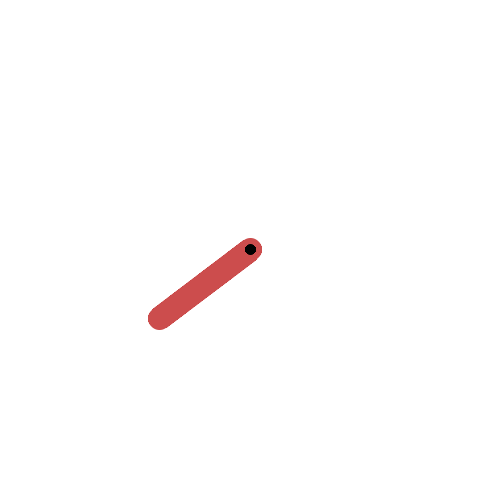

In [32]:
# Visualize pendulum before training
print("Visualizing pendulum before training...")
visualize_pendulum(model, folder="frames_before_training", episodes=3)
create_video("frames_before_training", "pendulum_before_training.gif")
display(IPImage(filename="pendulum_before_training.gif"))

#### 9. Training Loop

In [33]:
# Training loop
for ep in range(total_episodes):
    state, _ = env.reset()  # Reset environment and get initial state
    episodic_reward = 0  # Initialize episodic reward to 0
    done = False  # Initialize done flag to False
    truncated = False  # Initialize truncated flag to False

    while not done and not truncated:
        action = policy(state, epsilon)  # Choose action based on epsilon-greedy policy
        next_state, reward, done, truncated, _ = env.step([action])  # Take action in the environment
        buffer.record((state, action, reward, next_state, done))  # Record experience in replay buffer
        episodic_reward += reward  # Accumulate episodic reward

        # Perform training if buffer has enough samples
        if buffer.buffer_counter >= batch_size:
            states, actions, rewards, next_states, dones = buffer.sample()  # Sample batch from replay buffer
            rewards = tf.cast(rewards, dtype=tf.float32)  # Convert rewards to float32
            dones = tf.cast(dones, dtype=tf.float32)  # Convert dones to float32

            # Calculate target Q-values using the target Q-network
            target_q = rewards + gamma * tf.reduce_max(target_model(next_states), axis=1, keepdims=True) * (1 - dones)

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                q_values = model(states)  # Predict Q-values using the main Q-network
                actions_one_hot = tf.one_hot(tf.cast(actions, tf.int32), num_actions, dtype=tf.float32)  # One-hot encode actions
                q_values = tf.reduce_sum(q_values * actions_one_hot, axis=1, keepdims=True)  # Calculate Q-values for selected actions
                loss = tf.reduce_mean(tf.square(target_q - q_values))  # Compute MSE loss between predicted and target Q-values
            grads = tape.gradient(loss, model.trainable_variables)  # Compute gradients of loss w.r.t. Q-network weights
            optimizer.apply_gradients(zip(grads, model.trainable_variables))  # Apply gradients to update Q-network weights

            # Update target Q-network using soft update mechanism
            update_target_network(target_model.variables, model.variables, tau)

        state = next_state  # Update current state to next state

    epsilon = max(epsilon_min, epsilon * epsilon_decay)  # Decay epsilon for epsilon-greedy policy
    ep_reward_list.append(episodic_reward)  # Append episodic reward to episodic reward list
    avg_reward = np.mean(ep_reward_list[-40:])  # Compute average reward over last 40 episodes
    print(f"Episode {ep}, Avg Reward: {avg_reward}")  # Print average reward for current episode
    avg_reward_list.append(avg_reward)  # Append average reward to average reward list

Episode 0, Avg Reward: -1073.7780519535575
Episode 1, Avg Reward: -1284.0425347965215
Episode 2, Avg Reward: -1212.062726151056
Episode 3, Avg Reward: -1289.0129434981013
Episode 4, Avg Reward: -1343.5169207631195
Episode 5, Avg Reward: -1305.1392056380198
Episode 6, Avg Reward: -1257.883526906749
Episode 7, Avg Reward: -1295.8319297543349
Episode 8, Avg Reward: -1271.3478030351876
Episode 9, Avg Reward: -1260.7823226172763
Episode 10, Avg Reward: -1296.7991434697515
Episode 11, Avg Reward: -1262.555189530902
Episode 12, Avg Reward: -1254.3303823986957
Episode 13, Avg Reward: -1228.4580348104992
Episode 14, Avg Reward: -1219.0652461253871
Episode 15, Avg Reward: -1224.8453126599866
Episode 16, Avg Reward: -1250.5983784768123
Episode 17, Avg Reward: -1253.1563640675142
Episode 18, Avg Reward: -1240.485400265098
Episode 19, Avg Reward: -1252.7053453081915
Episode 20, Avg Reward: -1247.1235856966307
Episode 21, Avg Reward: -1255.762313991117
Episode 22, Avg Reward: -1243.306082063467
Epis

#### Explanation:

Training Loop: The outer loop runs for total_episodes, where each episode interacts with the environment to collect experiences.

Environment Interaction: env.reset() resets the environment and returns the initial state (state). env.step([action]) takes an action (action) based on the epsilon-greedy policy and returns the next state (next_state), reward (reward), and termination flags (done, truncated).

Experience Replay: The experience (state, action, reward, next_state, done) is recorded in the replay buffer (buffer.record()).

Training Condition: If the replay buffer contains enough experiences (buffer.buffer_counter >= batch_size), a batch of experiences is sampled (buffer.sample()).

Q-Value Calculation: Q-values are predicted using the main Q-network (model(states)) and then computed for selected actions using one-hot encoding.

Loss Computation: Mean Squared Error (MSE) loss is calculated between predicted Q-values (q_values) and target Q-values (target_q).

Gradient Descent: Gradients of the loss with respect to Q-network weights (model.trainable_variables) are computed using tf.GradientTape(). These gradients are applied to update Q-network weights using the optimizer (optimizer.apply_gradients()).

Target Network Update: Target Q-network (target_model) is updated using the soft update mechanism (update_target_network).

Epsilon Decay: Epsilon (epsilon) decays over time to gradually shift from exploration to exploitation.

Reward Tracking: Episodic reward (episodic_reward) is accumulated and appended to ep_reward_list. Average reward over the last 40 episodes (avg_reward) is computed and appended to avg_reward_list.

Logging: Prints the episode number and average reward for each episode during training.

#### 10. Plotting Results

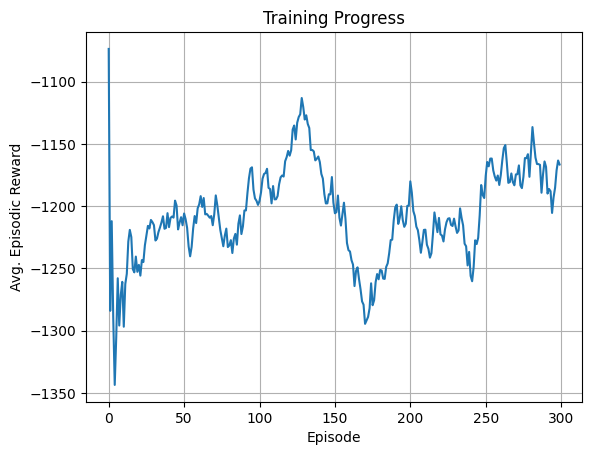

In [34]:
# Plotting the results
plt.plot(avg_reward_list)
plt.xlabel("Episode")
plt.ylabel("Avg. Episodic Reward")
plt.title("Training Progress")
plt.grid(True)
plt.show()

#### Explanation:

Plotting: Matplotlib is used to plot avg_reward_list against episode number to visualize the training progress.

X-axis: Episode number.

Y-axis: Average episodic reward (avg_reward).

Title: Title of the plot ("Training Progress").

Grid: Grid lines are displayed on the plot for better readability.

Visualizing pendulum after training...


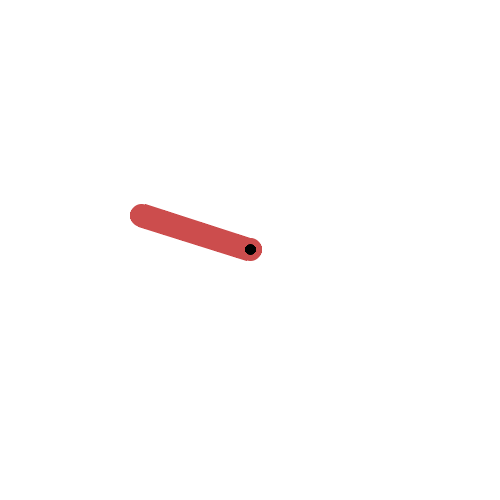

In [35]:
# Visualize pendulum after training
print("Visualizing pendulum after training...")
visualize_pendulum(model, folder="frames_after_training", episodes=3)
create_video("frames_after_training", "pendulum_after_training.gif")
display(IPImage(filename="pendulum_after_training.gif"))